# Function to visualize the pointcloud using open3d library

In [21]:
# Visualization with rgb intensity


import open3d as o3d
import numpy as np
import pandas as pd

# Load point cloud data from CSV file



def visualize_pointcloud(df_pcd):
    points = df_pcd.iloc[:, 0:3].values
    intensity = df_pcd.iloc[:, 3].values

    # Convert point cloud data to Open3D format
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points)

    # Normalizing the intensity value between [0, 1]
    normalized_intensity = (intensity - intensity.min()) / (intensity.max() - intensity.min())

    # Creating Color stack
    r_color = np.zeros(normalized_intensity.shape)
    g_color = normalized_intensity
    b_color = np.zeros(normalized_intensity.shape)


    # Creating 3d points using np.stack
    intensity_3d = np.stack((r_color, g_color, b_color), axis=-1)

    # Converting the np.array to pontcloud format
    colors = o3d.utility.Vector3dVector(intensity_3d)

    # Setting the color of pcd
    pcd.colors = colors


    # Visualizing the point cloud
    # o3d.visualization.draw_geometries([pcd])
    o3d.visualization.draw_geometries_with_editing([pcd], window_name='Visualize the kitti data - MOSAIQUE')



In [26]:
pcd_file_name

'bins/000000.bin'

### Looping through folders to find maximum number of person points inorder to effectively analyse

In [23]:
import os, glob
import numpy as np
import pandas as pd


os.chdir("/Volumes/Extreme SSD/semantic_kitti/")

max_person_points = 0

pcd_folder = "data_velodyne/sequences/05/velodyne/"
pcd_pattern = ".bin"
labels_folder = "data_labels/dataset/sequences/05/labels/"
labels_pattern = ".label"
# for pcd_file in glob.glob(os.path.join("data/00/velodyne/", '*.bin')):
#     print(pcd_file)

# for pcd_file in glob.glob(os.path.join("labels/00/labels/", '*.label')):
#     print(pcd_file)


# looping through the pointclouds files
for pcd_file_name in glob.glob(os.path.join(pcd_folder, '*.bin')):
    
    file_to_find = 'data_velodyne/sequences/05/velodyne/002617.bin'
    if pcd_file_name != file_to_find:
        continue
    
    file_prefix = pcd_file_name.split('/')[-1].split('.')[0]
    label_filename = labels_folder + file_prefix + ".label"
    # output_filename = f"{ parsed_args.output_dir }/{ parsed_args.output_file_prefix}{file_prefix}{parsed_args.output_file_format}"


    try:
        pointclouds = np.fromfile(pcd_file_name, dtype=np.float32)
    except FileNotFoundError:
        print("PointCloud file not found at {}".format(pcd_file_name))

    try:
        labels = np.fromfile(label_filename, dtype=np.uint32)
    except FileNotFoundError:
        print("Label file not found at {}".format(label_filename))


    rows = pointclouds.shape[0]//4    # dividing points clouds by 4 as the data needs to be divided to 4 columns to get number of rows
    columns = 6 # X, Y , Z, Emission, Semantic_label, Instance_Id

    final_array = np.zeros((rows, columns), dtype=np.float32)

    final_array[:, :4] = pointclouds.reshape((-1, 4)) # x, y , z, emission //== [N * X * Y * Z * Emis].


    final_array[:,4] = labels & 0xFFFF # Lower Half semantic label
    final_array[:,5] = labels >> 16  # Upper Half Instance Id
    
    
    

    df_pcd = pd.DataFrame(final_array)
    
    df_car = df_pcd[df_pcd.iloc[:,4] == 10]
    
    df_road = df_pcd[df_pcd.iloc[:,4] == 40]
    
    df_person = df_pcd[df_pcd.iloc[:,4] == 30]
    
    if df_person.shape[0] == 0:
        # print("No person in file ", file_prefix)
        print("-", end=" ")
    else:
        print("Person in file ", file_prefix)
        print("Person shape ", df_person.shape)
        if df_person.shape[0] > max_person_points:
            print(file_prefix)
            break
            # max_person_points = df_person.shape[0]

Person in file  002617
Person shape  (1980, 6)
002617


In [16]:
max_person_points

2167

In [26]:
visualize_pointcloud(df_person)

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [7]:
pcd_file_name

'data_velodyne/sequences/02/velodyne/000450.bin'

In [ ]:
'data_velodyne/sequences/02/velodyne/001608.bin'

In [27]:

df_person_road_car = df_pcd.drop(df_pcd[(df_pcd[4] != 10 ) & (df_pcd[4] != 30 ) & (df_pcd[4] != 40 )].index)

In [28]:

df_person_road_car.shape

(31211, 6)

In [29]:
df_person_road_car.head()

,0,1,2,3,4,5
12660,-0.729885,6.342163,0.194556,0.13,10.0,73.0
14220,30.103798,8.830876,-0.041566,0.00,10.0,79.0
16221,30.829395,8.675878,-0.243575,0.00,10.0,79.0
16222,30.767965,9.447950,-0.245492,0.00,10.0,79.0
16223,30.783506,9.558961,-0.246479,0.00,10.0,79.0


In [30]:
visualize_pointcloud(df_person_road_car)

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [31]:
set(df_road[5])

{0.0}

In [37]:

os.chdir("/Users/bisalgt/Projects/mosaique")

# Analyzing Surface Variation of Road, Car, Person using custom library

In [38]:
from utilities.surface_variation import PointCloudAnalysis

# Analysing Surface Variation of Road

In [40]:
road_points = df_road.iloc[:, :3].values
pcd_road = PointCloudAnalysis(road_points)

In [41]:
pcd_road.display_surface_variation()

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [42]:
road_surface_variation = pcd_road.get_normalized_surface_variation()

In [44]:
road_surface_variation

array([1.66291436e-04, 1.66291436e-04, 1.66291436e-04, ...,
       1.94328162e-01, 1.94328162e-01, 1.94328162e-01])

In [46]:
df_road_surface_variation = pd.DataFrame(road_surface_variation)

In [47]:
df_road_surface_variation

,0
0,0.000166
1,0.000166
2,0.000166
3,0.000166
4,0.000166
...,...
22441,0.071756
22442,0.194328
22443,0.194328
22444,0.194328


In [48]:
df_road_surface_variation.describe()

,0
count,22446.000000
mean,0.027974
std,0.055010
min,0.000000
25%,0.001680
50%,0.008670
75%,0.029508
max,1.000000


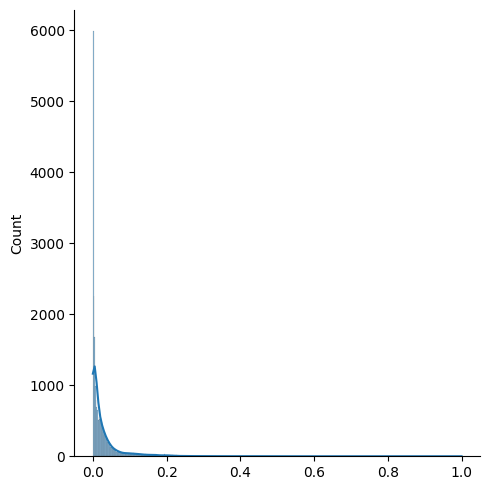

In [57]:
pcd_road.display_hist_from_seaborn(road_surface_variation)

# Analyzing Surface Varitaion of Car

In [49]:
car_points = df_car.iloc[:, :3].values
pcd_car = PointCloudAnalysis(car_points)

pcd_car.display_surface_variation()

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [50]:
car_surface_variation = pcd_car.get_normalized_surface_variation()

In [51]:
df_car_surface_variation = pd.DataFrame(car_surface_variation)

In [52]:
df_car_surface_variation.describe()

,0
count,6785.000000
mean,0.181081
std,0.147880
min,0.000000
25%,0.070135
50%,0.140159
75%,0.253107
max,1.000000


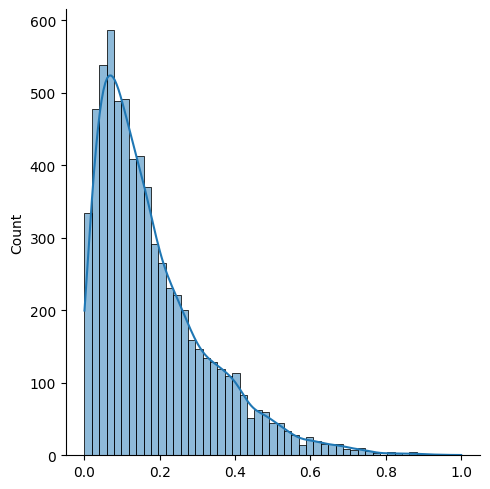

In [56]:
pcd_car.display_hist_from_seaborn(car_surface_variation)

# Analysing the surface variation of person

In [53]:
person_points = df_person.iloc[:, :3].values
pcd_person = PointCloudAnalysis(person_points)

pcd_person.display_surface_variation()

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [54]:
person_surface_variation = pcd_person.get_normalized_surface_variation()
df_person_surface_variation = pd.DataFrame(person_surface_variation)
df_person_surface_variation.describe()

,0
count,1980.000000
mean,0.420737
std,0.190293
min,0.000000
25%,0.276264
50%,0.412919
75%,0.547503
max,1.000000


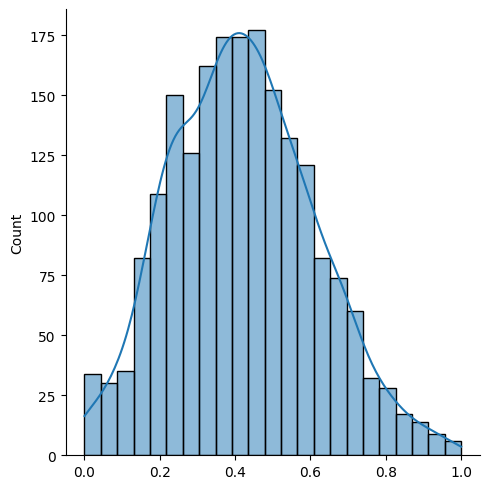

In [55]:
pcd_person.display_hist_from_seaborn(person_surface_variation)